### Full Name :  ADEL MOVAHEDIAN
### Student Number : 400102074


# Support Vector Machines (SVM)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [50]:
df = pd.read_csv("Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

(583, 11)
Age                             62
Gender                        Male
Total_Bilirubin               10.9
Direct_Bilirubin               5.5
Alkaline_Phosphotase           699
Alamine_Aminotransferase        64
Aspartate_Aminotransferase     100
Total_Protiens                 7.5
Albumin                        3.2
Albumin_and_Globulin_Ratio    0.74
label                            1
Name: 1, dtype: object
_________________________________________
Albumin_and_Globulin_Ratio    4
dtype: int64
_________________________________________
The dataset is imbalanced with an imbalance ratio of 2.49
_________________________________________


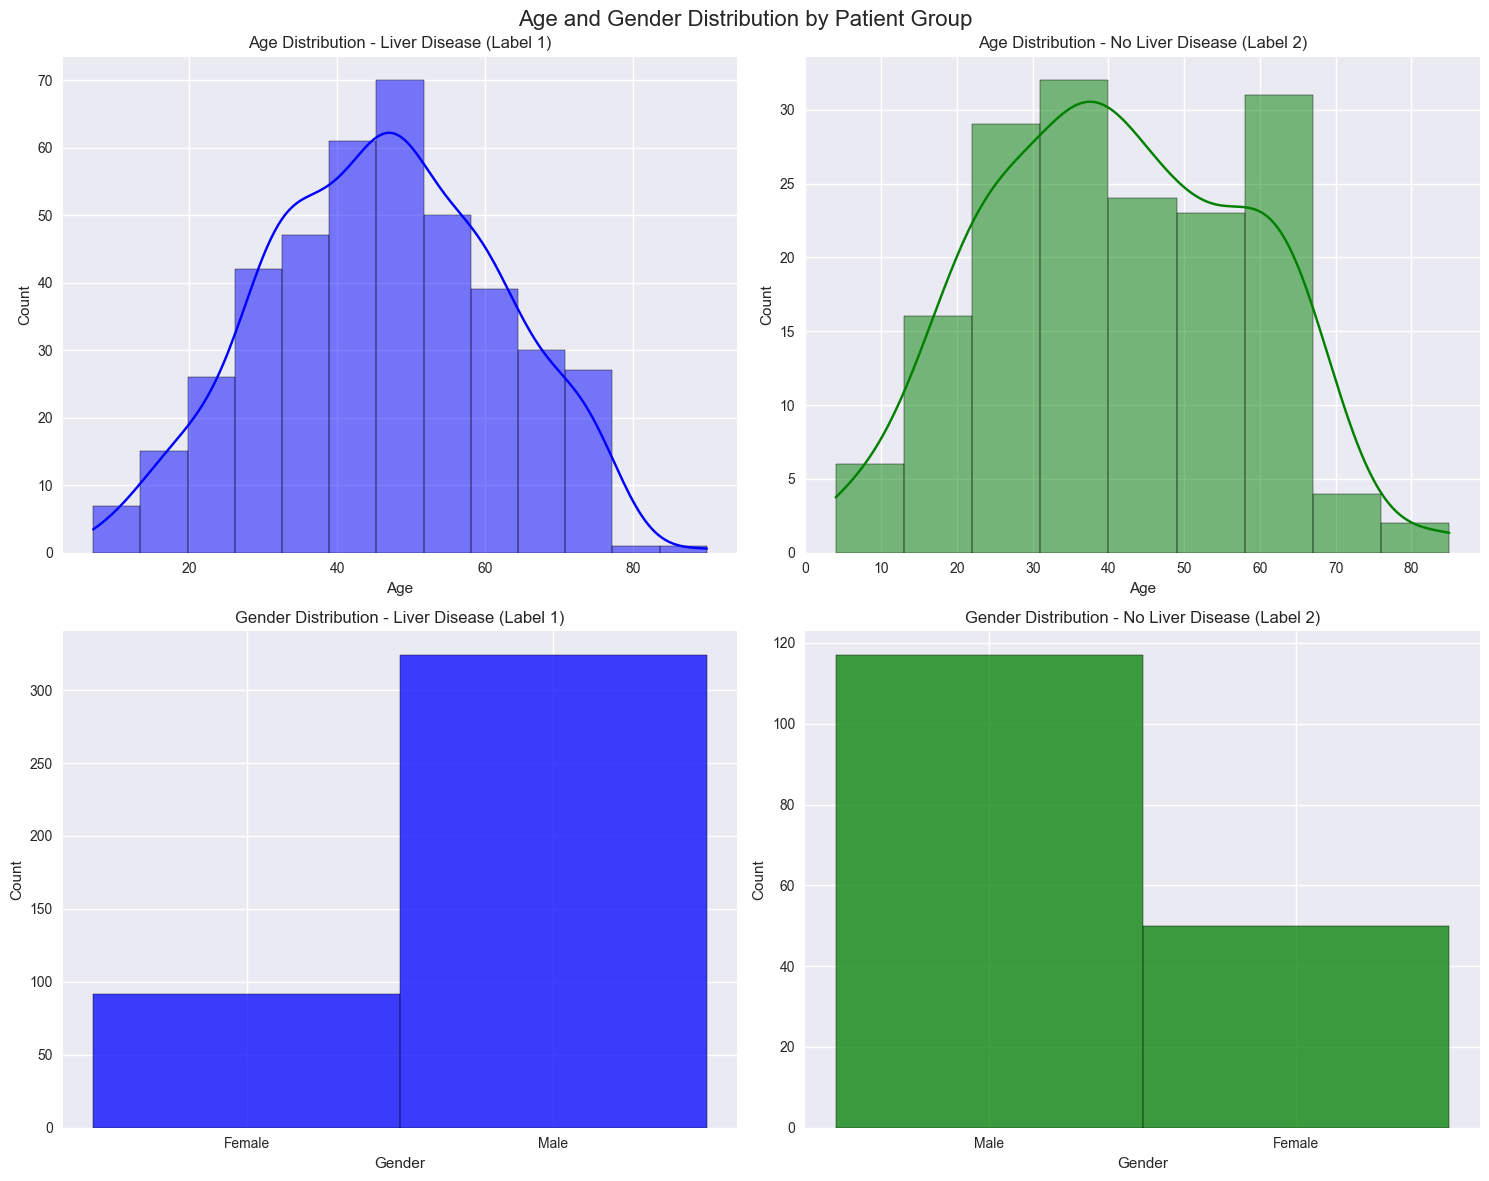

In [51]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
print(df.shape)
print(df.iloc[1,:])
print("_________________________________________")
###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
print("_________________________________________")
###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
class_distribution = df['label'].value_counts()
imbalance_threshold = 1.5 # if its 50/50 or 60/40 its balanced but more is imbalanced
imbalance_ratio = class_distribution.max() / class_distribution.min()
if imbalance_ratio > imbalance_threshold:
    print(f"The dataset is imbalanced with an imbalance ratio of {imbalance_ratio:.2f}")
else:
    print(f"The dataset is balanced with an imbalance ratio of {imbalance_ratio:.2f}")
print("_________________________________________")
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Age and Gender Distribution by Patient Group', fontsize=16)
sns.histplot(data=df[df['label'] == 1], x='Age', kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Age Distribution - Liver Disease (Label 1)')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')
sns.histplot(data=df[df['label'] == 2], x='Age', kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Age Distribution - No Liver Disease (Label 2)')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Count')
sns.histplot(data=df[df['label'] == 1], x='Gender', discrete=True, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Gender Distribution - Liver Disease (Label 1)')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Count')
sns.histplot(data=df[df['label'] == 2], x='Gender', discrete=True, ax=axs[1, 1], color='green')
axs[1, 1].set_title('Gender Distribution - No Liver Disease (Label 2)')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

liver diseases are more likely to cause at middle ages and more likely in men(but in this case there are more men in general) if we consider the imbalance ratio we see the same result . men are more likely to get this diseases :( 

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [52]:
################################################################################
## TODO 
################################################################################
# i use z-score method
def remove_outliers_z_score(dataframe, threshold=3):
    cleaned_df = dataframe.copy()
    for column in dataframe.select_dtypes(include=[np.number]).columns:
        z_scores = (dataframe[column] - dataframe[column].mean()) / dataframe[column].std()
        outliers = np.abs(z_scores) > threshold
        cleaned_df = cleaned_df[~outliers]
    return cleaned_df
df_cleaned = remove_outliers_z_score(df)
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (583, 11)
Cleaned DataFrame shape: (536, 11)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[~outliers]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[~outliers]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[~outliers]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[~outliers]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[~outliers]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16400\3926441837.py:10: UserWarning: Boolean Series key w

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [53]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns # where are the numerical columns
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
print(df_cleaned[numerical_cols].head())
df_cleaned

        Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase   
0  0.709302         0.015625          0.000000              0.139797  \
1  0.674419         0.546875          0.574468              0.717024   
2  0.674419         0.359375          0.425532              0.481398   
3  0.627907         0.031250          0.031915              0.134160   
4  0.790698         0.182292          0.202128              0.148816   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens   
0                  0.009804                    0.008511        0.533333  \
1                  0.088235                    0.095745        0.650000   
2                  0.081699                    0.061702        0.566667   
3                  0.006536                    0.010638        0.533333   
4                  0.027778                    0.052128        0.616667   

    Albumin  Albumin_and_Globulin_Ratio  label  
0  0.521739                     0.37500    0.0  
1  0.500000       

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,Female,0.015625,0.000000,0.139797,0.009804,0.008511,0.533333,0.521739,0.37500,0.0
1,0.674419,Male,0.546875,0.574468,0.717024,0.088235,0.095745,0.650000,0.500000,0.27500,0.0
2,0.674419,Male,0.359375,0.425532,0.481398,0.081699,0.061702,0.566667,0.521739,0.36875,0.0
3,0.627907,Male,0.031250,0.031915,0.134160,0.006536,0.010638,0.533333,0.543478,0.43750,0.0
4,0.790698,Male,0.182292,0.202128,0.148816,0.027778,0.052128,0.616667,0.326087,0.06250,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,Male,0.005208,0.000000,0.492672,0.016340,0.025532,0.383333,0.152174,0.04375,1.0
579,0.418605,Male,0.010417,0.000000,0.039459,0.040850,0.022340,0.400000,0.500000,0.50000,0.0
580,0.558140,Male,0.020833,0.010638,0.205186,0.062092,0.041489,0.466667,0.500000,0.43750,0.0
581,0.313953,Male,0.046875,0.042553,0.136415,0.031046,0.023404,0.533333,0.543478,0.43750,0.0


### SVM

#### spliting data

In [64]:
## TODO Split the data into test and training sets.
from sympy.abc import y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
label_encoder = LabelEncoder()

df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned = df_cleaned.dropna() #remove nan
X = df_cleaned.drop(columns='label')  # Features the target is the label column
y = df_cleaned['label'] # labels
X, y = shuffle(X, y)
X_train, X_test , y_train, y_test  = train_test_split(X, y, test_size=0.2 , stratify=y, random_state=42) # because we have an imbalanced dataset we should ,stratify = yes to maintain the distribution
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (425, 10)
Test Features Shape: (107, 10)
Training Labels Shape: (425,)
Test Labels Shape: (107,)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [81]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_model = SVC()
accuracies = cross_val_score(estimator=svm_model, X = X_train, y = y_train, cv = 4)
train_score = np.mean(accuracies)
svm_model.fit(X_train,y_train)
test_score = svm_model.score(X_test,y_test)
print("Train Score of Default Parameters:",train_score)
print("Test Score of Default Parameters:",test_score)


Train Score of Default Parameters: 0.6894286721918532
Test Score of Default Parameters: 0.6915887850467289


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [67]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
# Define the parameters
param_grid = {
    'C': [0.1, 1.0, 10 , 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4, 5]
}



class_weight='balanced' # for imbalanced dataset
bagging_svm = BaggingClassifier(SVC(), n_estimators=10)
bagging_svm.fit(X_train, y_train)

grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=s

Train an svm model on the entire training data using the parameters you found in the previous step.

In [82]:
#########################################################################################
## TODO
#########################################################################################
best_params = grid_search.best_params_

svm_best_model = SVC(**best_params)
svm_best_model.fit(X_train, y_train)

y_pred_best = svm_best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best parameters: {accuracy_best:.4f}")

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

Accuracy with best parameters: 0.7009

Classification Report (Best Model):
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82        74
         1.0       0.67      0.06      0.11        33

    accuracy                           0.70       107
   macro avg       0.68      0.52      0.47       107
weighted avg       0.69      0.70      0.60       107



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Explanation of each entry:<br>
True Positive (TP): Correctly predicted positive cases (upper left)  <br>
False Negative (FN): Positive cases that were wrongly predicted as negative (lower left)<br>
False Positive (FP): Negative cases that were wrongly predicted as positive (upper right)<br>
True Negative (TN): Correctly predicted negative cases (lower right)<br>

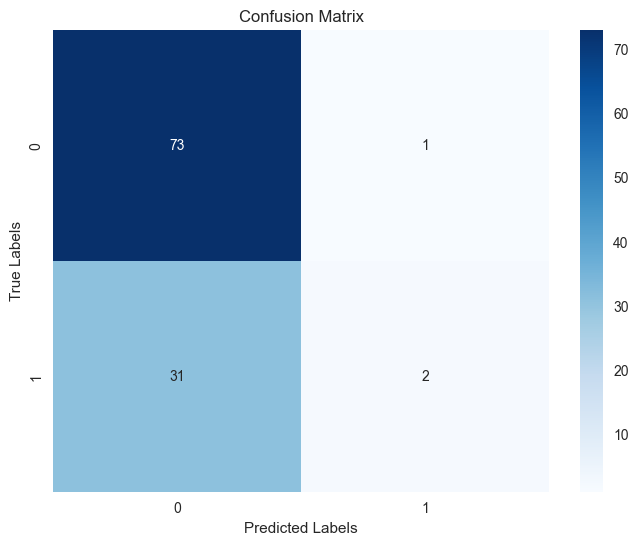


Accuracy on test set: 0.7009


In [83]:
#########################################################################################
## TODO
#########################################################################################
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(f"\nAccuracy on test set: {accuracy_best:.4f}")

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [88]:
#########################################################################################
## TODO
#########################################################################################
### Add some outliers, train SVM and Logistic Regression, and compare results

from sklearn.linear_model import LogisticRegression
import numpy as np

n_outliers = 10
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, X_train.shape[1]))
outlier_labels = np.random.choice([0, 1], size=n_outliers) 

X_train_with_outliers = np.vstack([X_train, outliers])
y_train_with_outliers = np.hstack([y_train, outlier_labels])

svm_outlier_model = SVC(**best_params)
svm_outlier_model.fit(X_train_with_outliers, y_train_with_outliers)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_with_outliers, y_train_with_outliers)

y_pred_svm_outliers = svm_outlier_model.predict(X_test)
y_pred_log_reg = log_reg_model.predict(X_test)

print("\nSVM Model with Outliers:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_outliers):.4f}")
print(classification_report(y_test, y_pred_svm_outliers))

print("\nLogistic Regression Model with Outliers:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))



SVM Model with Outliers:
Accuracy: 0.5327
              precision    recall  f1-score   support

         0.0       0.65      0.70      0.68        74
         1.0       0.19      0.15      0.17        33

    accuracy                           0.53       107
   macro avg       0.42      0.43      0.42       107
weighted avg       0.51      0.53      0.52       107


Logistic Regression Model with Outliers:
Accuracy: 0.6822
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81        74
         1.0       0.00      0.00      0.00        33

    accuracy                           0.68       107
   macro avg       0.34      0.49      0.41       107
weighted avg       0.48      0.68      0.56       107



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


i have shown model with and without outliers and we can see the difference between them the output contains every detail <br>
we clearly see that the accuracy will decrease when we add outliers .
<br>
and in general the logistic regression is not as good as the svm in this case it has a little bit lower accuracy.